In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re
from scipy.stats.stats import pearsonr
from sklearn import datasets, linear_model
import math

In [4]:
df = pd.read_csv("Accidents0514.csv",low_memory=False)
df_V = pd.read_csv("Vehicles0514.csv",low_memory=False)
df_C = pd.read_csv("Casualties0514.csv",low_memory=False)

In [5]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [8]:
#problem 1
df['Urban_or_Rural_Area'].value_counts()[1]/df['Urban_or_Rural_Area'].value_counts().sum()

0.64265691086842169

In [17]:
df.keys()

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [52]:
#Problem 2
#severity 
#code	label
#1	Fatal
#2	Serious
#3	Slight

fatal_acci = df['Accident_Severity'] == 1
fatal_df = df[fatal_acci]
all_count = {}
fatal_count = {}
for i in range(24):
    all_count[i] = 0.0
    fatal_count[i] = 0.0
for key in df['Time'].value_counts().keys():
    index = int(key[0:2])
    all_count[index] += (df['Time'].value_counts()[key])
for key in fatal_df['Time'].value_counts().keys():
    index = int(key[0:2])
    fatal_count[index] += (fatal_df['Time'].value_counts()[key])
prob = []
for i in range(24):
    prob.append(fatal_count[i]/all_count[i])
print("{0:.10f}".format(max(prob)))

0.0394866732


In [51]:
prob = []
for i in range(24):
    prob.append(fatal_count[i]/all_count[i])
print("{0:.10f}".format(max(prob)))
print(prob.index(max(prob)))

0.0394866732
4


In [61]:
#problem 3
#units of increased number of accidents per year.
#first get number per year
min(df['Date'].value_counts().keys())
max(df['Date'].value_counts().keys())
number_year = {}
for i in range(2005,2015):
    number_year[i] = 0.0
for key in df['Date'].value_counts().keys():
    index = int(key[-4:])
    number_year[index] += df['Date'].value_counts()[key]

increase_num = []
year = []
for i in range(2005,2014):
    increase_num.append(number_year[i+1] - number_year[i])
    year.append(i+1)

a = np.array(year)[np.newaxis].T
b = np.array(increase_num)
regr = linear_model.LinearRegression()

#regr.fit(year, increase_num)
regr.fit(a, b)
#print(a,b)
c = float(regr.coef_)
print("{0:.10f}".format(c))
regr.coef_

In [103]:
increase_num = []
year = []
for i in range(2005,2014):
    increase_num.append(number_year[i+1] - number_year[i])
    year.append(i+1)

a = np.array(year)[np.newaxis].T
b = np.array(increase_num)
regr = linear_model.LinearRegression()

#regr.fit(year, increase_num)
regr.fit(a, b)
#print(a,b)
#slope,intercept = np.polyfit(year, increase_num, 1)
#print(slope)
c = float(regr.coef_)
print("{0:.10f}".format(c))
#regr.coef_

1411.46666667
1411.4666666667


array([ 1411.46666667])

In [117]:
#Problem 4
speed_limit = []
cas_acc_ratio = []



for key in df['Speed_limit'].value_counts().keys():
    speed_limit.append(float(key))
    speed_key = df['Speed_limit'] == key
    speed_df = df[speed_key]
    #print(speed_df['Number_of_Casualties'].sum())
    #print(df['Speed_limit'].value_counts()[key])
    ratio = speed_df['Number_of_Casualties'].sum()/df['Speed_limit'].value_counts()[key]
    cas_acc_ratio.append(ratio)
print(speed_limit)
print(cas_acc_ratio)
pearsonr(speed_limit,cas_acc_ratio)
print("{0:.10f}".format(pearsonr(speed_limit,cas_acc_ratio)[0]))

[30.0, 60.0, 40.0, 70.0, 50.0, 20.0, 10.0, 15.0]
[1.2693620233045813, 1.5159866606908181, 1.4361206947831777, 1.5690861445031405, 1.5054084720121028, 1.1758898854854176, 1.1764705882352942, 1.125]
0.9659390555


In [172]:
#Problem 5
"""
S
code	label
0	None
1	Skidded
2	Skidded and overturned
3	Jackknifed
4	Jackknifed and overturned
5	Overturned
-1	Data missing or out of range
>0/>=0

Weather
code	label
!1	Fine no high winds
@2	Raining no high winds
@3	Snowing no high winds
4	Fine + high winds
@5	Raining + high winds
@6	Snowing + high winds
7	Fog or mist
8	Other
9	Unknown
-1	Data missing or out of range


"""
#df_V = pd.read_csv("K:/DI/10-26-2017/Stats19_Data_2005-2014/Vehicles0514.csv",low_memory=False)
#df_V['Skidding_and_Overturning'].value_counts()
#print(df_V.shape)
#print(df.shape)
#df['Weather_Conditions'].value_counts()
#df_V[''].value_counts()
#df[''].value_counts()

#two table connected by accident index
#ration for fine weather
condition_weather_fine = df['Weather_Conditions'] == 1
weather_fine_df = df[condition_weather_fine]

f_acci = weather_fine_df['Accident_Index']
F_S_count = 0
F_A_count = 0
NF_S_count = 0
NF_A_count = 0
i = 0 


for acc in f_acci:
    while df_V[i:i+1]['Accident_Index'][i] != acc:
        i += 1
    while df_V[i:i+1]['Accident_Index'][i] == acc:
        if df_V[i:i+1]['Skidding_and_Overturning'][i] >= 0:
            F_A_count += 1
            if df_V[i:i+1]['Skidding_and_Overturning'][i] > 0:
                F_S_count += 1
        i += 1
    if i > len(df_V):
        break

condition_weather_bad = df['Weather_Conditions'].isin([2,3,5,6]) 
weather_bad_df = df[condition_weather_bad]
i = 0
b_acci = weather_bad_df['Accident_Index']
for acc in b_acci:
    while df_V[i:i+1]['Accident_Index'][i] != acc:
        i += 1
    while df_V[i:i+1]['Accident_Index'][i] == acc:
        if df_V[i:i+1]['Skidding_and_Overturning'][i] >= 0:
            NF_A_count += 1
            if df_V[i:i+1]['Skidding_and_Overturning'][i] > 0:
                NF_S_count += 1
        i += 1
    if i > len(df_V):
        break
ratio_B = NF_S_count/NF_A_count
print("{0:.10f}".format(ratio_B/ratio_F))      


ratio_F = F_S_count/F_A_count
    

In [232]:
for c in a[0:100]:
    d = (df_V.loc[df_V['Accident_Index'] ==c, 'Skidding_and_Overturning'])

In [ ]:
e = df_V['Accident_Index'] == c
df_V[e]['Skidding_and_Overturning']


In [161]:
#Start from S condition:
#generate fine_S_count, F_A_count, NF_S_count, NF_A_count
#condition_s = df_V['Skidding_and_Overturning'] > 0
#df_V_s = df_V[condition_s]
#s_acci = df_V_s['Accident_Index']

In [238]:
#have to do both iteration at the same time
F_S_count = 0
F_A_count = 0
NF_S_count = 0
NF_A_count = 0
i = 0 


for acc in f_acci:
    while df_V[i:i+1]['Accident_Index'][i] != acc:
        i += 1
    while df_V[i:i+1]['Accident_Index'][i] == acc:
        if df_V[i:i+1]['Skidding_and_Overturning'][i] >= 0:
            F_A_count += 1
            if df_V[i:i+1]['Skidding_and_Overturning'][i] > 0:
                F_S_count += 1
        i += 1
    if i > len(df_V):
        break
condition_weather_bad = df['Weather_Conditions'].isin([2,3,5,6]) 

#or df['Weather_Conditions'] == 3 \
#                         or df['Weather_Conditions'] == 5 or df['Weather_Conditions'] == 6)
#b = condition_weather_bad  condition_weather_bad1
weather_bad_df = df[condition_weather_bad]
i = 0
b_acci = weather_bad_df['Accident_Index']
for acc in b_acci:
    while df_V[i:i+1]['Accident_Index'][i] != acc:
        i += 1
    while df_V[i:i+1]['Accident_Index'][i] == acc:
        if df_V[i:i+1]['Skidding_and_Overturning'][i] >= 0:
            NF_A_count += 1
            if df_V[i:i+1]['Skidding_and_Overturning'][i] > 0:
                NF_S_count += 1
        i += 1
    if i > len(df_V):
        break
ratio_B = NF_S_count/NF_A_count
print("{0:.10f}".format(ratio_B/ratio_F))      


IndexError: index out of bounds

In [242]:
print (F_S_count/F_A_count)
ratio_F = F_S_count/F_A_count

0.11713150026830513


In [257]:
condition_weather_bad = df['Weather_Conditions'].isin([2,3,5,6]) 

#or df['Weather_Conditions'] == 3 \
#                         or df['Weather_Conditions'] == 5 or df['Weather_Conditions'] == 6)
#b = condition_weather_bad  condition_weather_bad1
weather_bad_df = df[condition_weather_bad]
i = 0
b_acci = weather_bad_df['Accident_Index']
for acc in b_acci:
    while df_V[i:i+1]['Accident_Index'][i] != acc:
        i += 1
    while df_V[i:i+1]['Accident_Index'][i] == acc:
        if df_V[i:i+1]['Skidding_and_Overturning'][i] >= 0:
            NF_A_count += 1
            if df_V[i:i+1]['Skidding_and_Overturning'][i] > 0:
                NF_S_count += 1
        i += 1
    if i > len(df_V):
        break

In [258]:
ratio_B = NF_S_count/NF_A_count

In [261]:
ratio_B/ratio_F
print("{0:.10f}".format(ratio_B/ratio_F))

1.7809261658


In [317]:
#Problem 6
#using file Casualties0514.csv
#df_C = pd.read_csv("K:/DI/10-26-2017/Stats19_Data_2005-2014/Casualties0514.csv",low_memory=False)
"""
Casualty_Severity
code	label
1	Fatal
2	Serious
3	Slight

Casualty Class
code	label
1	Driver or rider
2	Passenger
3	Pedestrian

sex
code	label
1	Male
2	Female
3	Not known
-1	Data missing or out of range


"""
#df_V['Vehicle_Manoeuvre'].value_counts()
# df_C['Sex_of_Casualty'].value_counts()
# df_C['Casualty_Class'].value_counts()
# df_C['Casualty_Class'].value_counts()
# len(df_C)

#parked list
condition_parked = df_V['Vehicle_Manoeuvre'] == 2
df_V_parked = df_V[condition_parked]
df_V_parked['Accident_Index'].value_counts()
parked_list = list(df_V_parked['Accident_Index'])

df_C['Sex_of_Casualty'].value_counts()
condition_male = df_C['Sex_of_Casualty'] == 1 #and df_C['Casualty_Class'] == 1
df_C_m = df_C[condition_male]
condition_driver = df_C_m['Casualty_Class'] == 1
df_C_m_d = df_C_m[condition_driver]
condition_notpark = ~df_C_m_d['Accident_Index'].isin(parked_list)
df_C_m_d_np = df_C_m_d[condition_notpark]
ratio_m = df_C_m_d_np['Casualty_Severity'].value_counts()[1]/df_C_m_d_np['Casualty_Severity'].value_counts().sum()

condition_female = df_C['Sex_of_Casualty'] == 2 #and df_C['Casualty_Class'] == 1
df_C_f = df_C[condition_female]
condition_driver = df_C_f['Casualty_Class'] == 1
df_C_f_d = df_C_f[condition_driver]
condition_notpark = ~df_C_f_d['Accident_Index'].isin(parked_list)
df_C_f_d_np = df_C_f_d[condition_notpark]
ratio_f = df_C_f_d_np['Casualty_Severity'].value_counts()[1]/df_C_f_d_np['Casualty_Severity'].value_counts().sum()
print("{0:.10f}".format(ratio_m/ratio_f))

2.8283112562


In [350]:
#problem 7
#using Longitude	Latitude	Police_Force

#according to https://rechneronline.de/earth-radius/, using latitude 52.3555 of england on average from wiki, radius
#of earth is 6364.771 km at sea level

df['Police_Force'].value_counts()
long_list = []
lati_list = []
area = []


for i in range(98):
    condition = df['Police_Force'] == i+1
    df_7 = df[condition]
    long_list.append(np.std(df_7['Longitude']))
    lati_list.append(np.std(df_7['Latitude']))
for i in range(98):
    if str(long_list[i]) != 'nan':
        area.append(np.pi**3*long_list[i]*lati_list[i]*6364.771**2/180**2)
    else:
        area.append(0)
print ("{0:.10f}".format(max(area)))
#northern district

36188.5753566261


In [374]:
#Problem 8
#actually accidents involve usually multiple people, here using only driver's age to fit
age = []
acci_num = []

for key in df_V['Age_of_Driver'].value_counts().keys():
    if key >16:
        age.append(key)
        acci_num.append(df_V['Age_of_Driver'].value_counts()[key])
log_num = np.log(acci_num)
slope,intercept = np.polyfit(age, log_num, 1)
print ("{0:.10f}".format(-slope))

0.0778510006


In [356]:
log_num = np.log(acci_num)

In [358]:
slope,intercept = np.polyfit(age, log_num, 1)

In [359]:
slope

-0.077851000616006139

In [372]:
pred = []
diff = []
for i in range(len(age)):
    pred.append(np.exp(intercept+slope*age[i]))
    diff.append(acci_num[i] - pred[-1])

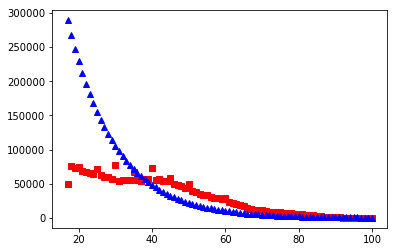

In [379]:
a = plt.plot(age,acci_num, 'bs', color='r')
b = plt.plot(age,pred, 'g^', color = 'b')
plt.show()